In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

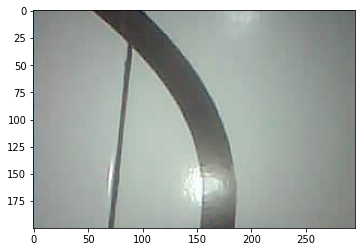

In [9]:
# import image
img1 = cv2.imread('image/thresh-1.png')
img2 = cv2.imread('image/thresh-2.png')
img1 = img1[100:300, :]
img2 = img2[100:300, :]

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# display image
plt.imshow(img2)
plt.show()


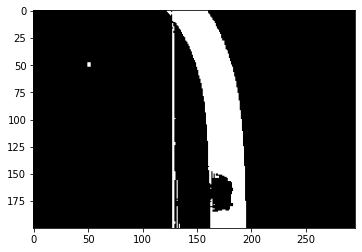

In [10]:
# thresholding
thresh = cv2.adaptiveThreshold(gray1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,99,10)
plt.imshow(thresh, cmap='gray')
plt.show()

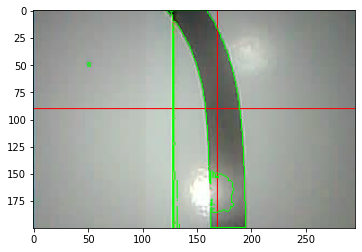

In [12]:
# contour
contours = 0
img = img1
CX = []
CY = []
contours,hierarchy = cv2.findContours(thresh.copy(), 1, cv2.CHAIN_APPROX_NONE)

if len(contours) > 0:
        c = max(contours, key=cv2.contourArea)
        # find center of contour
        M = cv2.moments(c)
        if M["m00"] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            CX.append(cx)
            CY.append(cy)
        else:
            cx = CX[-1]
            cy = CY[-1]

        # draw contour
        cv2.line(img,(cx,0),(cx,720),(255,0,0),1)
        cv2.line(img,(0,cy),(1280,cy),(255,0,0),1)
        cv2.drawContours(img, contours, -1, (0,255,0), 1)

plt.imshow(img)
plt.show()